<a href="https://colab.research.google.com/github/garfield-gray/MachineLearning/blob/main/pytorch/2_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from sklearn.datasets import make_circles


# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    ) # keep random state so we get the same values

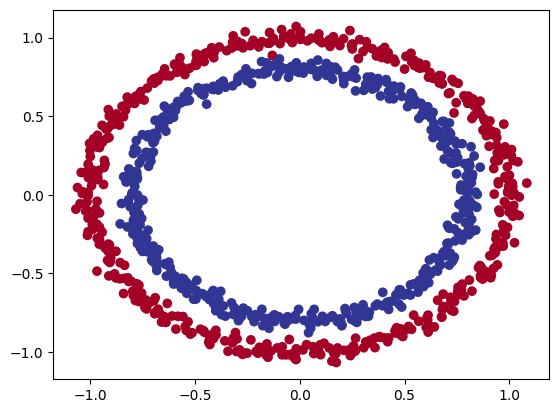

In [6]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [7]:
# prompt: turn X and y into torch.tensor format and split them into train and test

import torch
from sklearn.model_selection import train_test_split

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [11]:
# Replicate CircleModelV0 with nn.Sequential
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
model_0 = nn.Sequential(

    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3756, -0.5760],
                      [ 0.0377,  0.3444],
                      [ 0.6932,  0.0408],
                      [ 0.3912, -0.1989],
                      [-0.1416,  0.5793]])),
             ('0.bias', tensor([-0.2876,  0.2985,  0.2264, -0.5664,  0.0987])),
             ('1.weight',
              tensor([[-0.3228, -0.1289, -0.1729,  0.2498,  0.3879]])),
             ('1.bias', tensor([-0.0729]))])

In [13]:
# 1. Construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features (X), produces 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, produces 1 feature (y)

    # 3. Define a forward method containing the forward pass computation
    def forward(self, x):
        # Return the output of layer_2, a single feature, the same shape as y
        return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2

# 4. Create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.5683,  0.3049],
                      [-0.3855, -0.1629],
                      [-0.3552,  0.0684],
                      [ 0.6776,  0.6296],
                      [-0.5994,  0.1092]])),
             ('layer_1.bias',
              tensor([ 0.5569, -0.1600,  0.1651, -0.0844, -0.1611])),
             ('layer_2.weight',
              tensor([[ 0.1166,  0.1438,  0.2554, -0.2351, -0.3399]])),
             ('layer_2.bias', tensor([-0.2187]))])